
# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The data came from the FBI's National Instant Criminal Background Check System. The NICS is used to determine wheather a prospective buyer is eligible to buy firearm or explosives. In this study, focus will be on the variation in arm possesion over the given period of time while comparing it with the various gun type and the given state.
.
### Question(s) for Analysis
1. What month (year) has the highest issuance of permit?.
2. What is the gun trend in the Country?
3. What State has the maximum and mininium gun per capita?
4. What firearm in perentage is most posessed?



In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [340]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [341]:
df_gun = pd.read_excel('gun-data.xlsx')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [342]:
df_census = pd.read_csv('U.S. Census Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [343]:
# We will transpose the census data
df_census.set_index("Fact", inplace=True)
df_census = df_census.transpose().reset_index()

In [344]:
#confirm changes
df_census

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html Reference.

In [345]:
#check the column label in the census dataset 
df_census.columns

Index([                                                                                 'index',
                                                 'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                              

https://www.geeksforgeeks.org/python-pandas-dataframe-columns/#:~:text=Pandas%20DataFrame%20is%20a%20two,like%20container%20for%20Series%20objects. Reference

In [346]:
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
# Check the total number of rows and columns in the dataset
df_gun.shape

(12485, 27)

In [348]:

df_census.shape

(51, 86)

In [349]:
# Check the datatype and number of non null values of the various variables
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [350]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 86 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   index                                                                                   51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [351]:
# check for duplicated enteries
df_gun.duplicated().sum()

0

In [352]:

df_census.duplicated().sum()

0

In [353]:
# check the number of null values in the dataset
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [354]:
df_census.isnull().sum()

Fact
index                                                                                     0
Population estimates, July 1, 2016,  (V2016)                                              1
Population estimates base, April 1, 2010,  (V2016)                                        1
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     1
Population, Census, April 1, 2010                                                         1
                                                                                         ..
FN                                                                                       50
NaN                                                                                      50
S                                                                                        50
X                                                                                        50
Z                                                                          

In [355]:
# Let's see in percentage
df_gun.isnull().mean().round(4) * 100

month                         0.00
state                         0.00
permit                        0.19
permit_recheck               91.19
handgun                       0.16
long_gun                      0.15
other                        55.95
multiple                      0.00
admin                         0.18
prepawn_handgun              15.56
prepawn_long_gun             15.58
prepawn_other                59.03
redemption_handgun           15.54
redemption_long_gun          15.55
redemption_other             59.03
returned_handgun             82.38
returned_long_gun            82.82
returned_other               85.46
rentals_handgun              92.07
rentals_long_gun             93.39
private_sale_handgun         77.97
private_sale_long_gun        77.97
private_sale_other           77.97
return_to_seller_handgun     80.18
return_to_seller_long_gun    77.97
return_to_seller_other       81.94
totals                        0.00
dtype: float64

In [356]:
df_census.isnull().mean().round(4)*100#

Fact
index                                                                                     0.00
Population estimates, July 1, 2016,  (V2016)                                              1.96
Population estimates base, April 1, 2010,  (V2016)                                        1.96
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     1.96
Population, Census, April 1, 2010                                                         1.96
                                                                                         ...  
FN                                                                                       98.04
NaN                                                                                      98.04
S                                                                                        98.04
X                                                                                        98.04
Z                                            

In [357]:
# let's check the statistical characteristics of the dataset.
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [358]:
df_census.describe()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
count,51,50,50,50,50,50,50,50,50,50,...,0,0,1,1,1,1,1,1,1,1
unique,51,50,50,45,50,29,29,43,40,39,...,0,0,1,1,1,1,1,1,1,1
top,Fact Note,"4,863,300","4,780,131",1.70%,"4,779,736",6.40%,7.10%,22.80%,25.50%,16.10%,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
freq,1,1,1,3,1,6,4,3,3,4,...,NaN,NaN,1,1,1,1,1,1,1,1


### Report on Data Wrangling
The given dataset are the Gun and Census dataset.The Gun dataset contains 12485 rows and 27 columns. There are no duplicated enteries and all columns have null values except month, state, multiple and total. Rentals_long_guns had the highest with 93.39% while long_gun had the least with only 0.16%. While the Census dataset after it's been transpose contains 51 rows and 86 columns with no duplicated enteries, all it's columns has non_null values. Fact Note had the highest with 67.06% while Fact had the least with 5.88%



### Data Cleaning
> Based on the wrangling process, we would clean the data in the following steps

* Drop columns with more than 30% null value
* * Drop column that are not relevant to our research
* Fill other null values with the average value of its column

In [359]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [360]:
# Drop column with more than 30% null values for NICS data
df_gun.drop(columns= ['permit_recheck','prepawn_other', 'redemption_other', 'redemption_handgun', 'redemption_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], inplace = True)
df_gun.columns

Index(['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple',
       'admin', 'prepawn_handgun', 'prepawn_long_gun', 'returned_handgun',
       'returned_long_gun', 'totals'],
      dtype='object')

In [361]:
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
#select specific columns we want to use so as get a clarity of the datatset
df_census = df_census[['index', 'Population estimates, July 1, 2016,  (V2016)','Population, Census, April 1, 2010','Persons under 18 years, percent, July 1, 2016,  (V2016)','Persons under 18 years, percent, April 1, 2010']]
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010"
0,Fact Note,NaN,NaN,NaN,NaN
1,Alabama,"4,863,300","4,779,736",22.60%,23.70%
2,Alaska,"741,894","710,231",25.20%,26.40%
3,Arizona,"6,931,071","6,392,017",23.50%,25.50%
4,Arkansas,"2,988,248","2,915,918",23.60%,24.40%


In [363]:
# drop Fact Note from dataset using its index
df_census.drop(index=0, inplace= True)

C:\Users\HP\Documents\New folder (2)\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [364]:
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010"
1,Alabama,"4,863,300","4,779,736",22.60%,23.70%
2,Alaska,"741,894","710,231",25.20%,26.40%
3,Arizona,"6,931,071","6,392,017",23.50%,25.50%
4,Arkansas,"2,988,248","2,915,918",23.60%,24.40%
5,California,"39,250,017","37,253,956",23.20%,25.00%


In [365]:
# Drop column that are irrelevant to our research
df_gun.drop(columns = ['multiple','admin','prepawn_handgun','prepawn_long_gun','returned_handgun','returned_long_gun','totals'],inplace = True)
            

In [366]:
df_gun.head()

,month,state,permit,handgun,long_gun,other
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0


In [367]:
#since most states classify thier firearms as either handgun or longguns,although other has a high value, we are instead going to drop and fill with 0.
df_gun.other.fillna(value= 0, inplace= True)
df_gun.other

0         221.0
1         219.0
2         920.0
3         165.0
4        2984.0
          ...  
12480       0.0
12481       0.0
12482       0.0
12483       0.0
12484       0.0
Name: other, Length: 12485, dtype: float64

https://medium.com/data-professor/how-to-handle-missing-data-in-python-using-pandas-c66ef8538443 Reference


In [368]:
#check for the unique value of state in the dataset
df_gun.state.nunique()

55

https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html. Reference


In [369]:
#check for missing values
df_census.isnull().sum()

Fact
index                                                      0
Population estimates, July 1, 2016,  (V2016)               0
Population, Census, April 1, 2010                          0
Persons under 18 years, percent, July 1, 2016,  (V2016)    0
Persons under 18 years, percent, April 1, 2010             0
dtype: int64

In [370]:
#check for duplicated enteries
df_census.duplicated().sum()

0

In [371]:
#rename columns we want to use
df_census.columns = ['state', 'population_2016', 'population_2010', 'u18_percent_2016', 'u18_percent_2010']

In [372]:
#confirm changes
df_census.head()

,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010
1,Alabama,"4,863,300","4,779,736",22.60%,23.70%
2,Alaska,"741,894","710,231",25.20%,26.40%
3,Arizona,"6,931,071","6,392,017",23.50%,25.50%
4,Arkansas,"2,988,248","2,915,918",23.60%,24.40%
5,California,"39,250,017","37,253,956",23.20%,25.00%


In [373]:
#Remove spaces and percentsymbols and replace with underscore and lowercase label
df_census.population_2016 = df_census.population_2016.str.replace(",",'')
df_census.population_2010 = df_census.population_2010.str.replace(",",'')
df_census.u18_percent_2016 = df_census.u18_percent_2016.str.replace('%','')
df_census.u18_percent_2010 = df_census.u18_percent_2010.str.replace('%','')


C:\Users\HP\Documents\New folder (2)\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [374]:
#confirm changes
df_census.head()

,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010
1,Alabama,4863300,4779736,22.60,23.70
2,Alaska,741894,710231,25.20,26.40
3,Arizona,6931071,6392017,23.50,25.50
4,Arkansas,2988248,2915918,23.60,24.40
5,California,39250017,37253956,23.20,25.00


https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html. Reference

In [375]:
#check the general information of the hybrid dataset
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             50 non-null     object
 1   population_2016   50 non-null     object
 2   population_2010   50 non-null     object
 3   u18_percent_2016  50 non-null     object
 4   u18_percent_2010  50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [376]:
#convert the census poplulation from a string to an integer
#convert percent to a float
df_census.population_2016 = df_census.population_2016.astype(int)
df_census.population_2010 = df_census.population_2010.astype(int)
df_census.u18_percent_2016 = df_census.u18_percent_2016.astype(float)
df_census.u18_percent_2010 = df_census.u18_percent_2010.astype(float)


C:\Users\HP\Documents\New folder (2)\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [377]:
#confirm changes
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             50 non-null     object 
 1   population_2016   50 non-null     int32  
 2   population_2010   50 non-null     int32  
 3   u18_percent_2016  50 non-null     float64
 4   u18_percent_2010  50 non-null     float64
dtypes: float64(2), int32(2), object(1)
memory usage: 2.0+ KB


https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.to_numeric.html. Reference

In [378]:
#To determine the percentage of persons eligible to possess firearm,deduct the percentage of persons under18, as it is univerally accepted that,an individual is termed an adult from 18yrs uppwards.

df_census['percent_adult_2016'] = 100 - df_census.u18_percent_2016
df_census['percent_adult_2010'] = 100 - df_census.u18_percent_2010


C:\Users\HP\AppData\Local\Temp/ipykernel_8656/1335263961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['percent_adult_2016'] = 100 - df_census.u18_percent_2016
C:\Users\HP\AppData\Local\Temp/ipykernel_8656/1335263961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['percent_adult_2010'] = 100 - df_census.u18_percent_2010


In [379]:
#confirm changes
df_census.head()

,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010,percent_adult_2016,percent_adult_2010
1,Alabama,4863300,4779736,22.6,23.7,77.4,76.3
2,Alaska,741894,710231,25.2,26.4,74.8,73.6
3,Arizona,6931071,6392017,23.5,25.5,76.5,74.5
4,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6
5,California,39250017,37253956,23.2,25.0,76.8,75.0


In [380]:
#To determine the population of adults
df_census['adult_population_2016'] = (df_census.percent_adult_2016/100)* df_census.population_2016
df_census['adult_population_2010'] = (df_census.percent_adult_2010/100)* df_census.population_2010


C:\Users\HP\AppData\Local\Temp/ipykernel_8656/2049750887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['adult_population_2016'] = (df_census.percent_adult_2016/100)* df_census.population_2016
C:\Users\HP\AppData\Local\Temp/ipykernel_8656/2049750887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['adult_population_2010'] = (df_census.percent_adult_2010/100)* df_census.population_2010


In [381]:
#confirm changes
df_census.head()

,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
1,Alabama,4863300,4779736,22.6,23.7,77.4,76.3,3.764194e+06,3.646939e+06
2,Alaska,741894,710231,25.2,26.4,74.8,73.6,5.549367e+05,5.227300e+05
3,Arizona,6931071,6392017,23.5,25.5,76.5,74.5,5.302269e+06,4.762053e+06
4,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6,2.283021e+06,2.204434e+06
5,California,39250017,37253956,23.2,25.0,76.8,75.0,3.014401e+07,2.794047e+07


In [382]:
#check for the unique value for the state
df_census.state.nunique()

50

In [383]:
df_gun.state.nunique()

55

In [384]:
# Save new dataset to csv
df_census.to_csv('df_census_clean')

In [385]:
# Load new dataset
df_census = pd.read_csv('df_census_clean')
df_census.sample(5)

,Unnamed: 0,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
28,29,New Hampshire,1334795,1316470,19.5,21.8,80.5,78.2,1074509.975,1029479.540
43,44,Utah,3051217,2763885,30.2,31.5,69.8,68.5,2129749.466,1893261.225
9,10,Georgia,10310371,9687653,24.4,25.7,75.6,74.3,7794640.476,7197926.179
11,12,Idaho,1683140,1567582,26.0,27.4,74.0,72.6,1245523.600,1138064.532
17,18,Louisiana,4681666,4533372,23.8,24.7,76.2,75.3,3567429.492,3413629.116


In [386]:
#To ascertain the states that are not captured census datatset
fb_state = df_gun.state.unique()
df_census_state = df_census.state.unique() 

In [387]:
#confirm states not in the census dataset
invalid = []
for state in fb_state:
    if state not in df_census_state:
        invalid.append(state)
print(invalid)

['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']


In [388]:
#Drop the states that are not relevant to the census dataset
def dropstate(states, df_gun):
    for state in states:        
        df_gun = df_gun[df_gun.state != state]
    return df_gun

https://www.programiz.com/python-programming/for-loop. Reference


In [389]:
df_gun = dropstate(invalid, df_gun)

In [390]:
# To confirm the number of both the census and gun dataset have the same unique values and are working with same number of states same
df_gun.state.nunique()

50

In [391]:
#check for missing value

df_gun.isnull().sum()

month       0
state       0
permit      2
handgun     0
long_gun    0
other       0
dtype: int64

In [392]:
#Extract the missing values from dataset
df_gun[df_gun.permit.isnull()]

,month,state,permit,handgun,long_gun,other
7279,2006-09,Louisiana,NaN,5948.0,10836.0,0.0
7310,2006-09,Virginia,NaN,6935.0,11023.0,0.0


In [393]:
#check the  permit datatype for the State of Louisiana and also use the mode  to  asertain the most occuring value
check = df_gun[df_gun.state == 'Louisiana']
check.permit.mode()

0    0.0
dtype: float64

In [394]:
#check the  permit datatype for the State of Virginia and also use the mode  to  asertain the most occuring value
check = df_gun[df_gun.state == 'Virginia']
check.permit.mode()

0    0.0
dtype: float64

In [395]:
#Use the mode value of 0, to fill the missing data
# confirm changes
df_gun.permit.fillna(value= 0, inplace= True)
df_gun.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
other       0
dtype: int64

In [396]:
#check the general information on the hybrid gun dataset 
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     11350 non-null  object 
 1   state     11350 non-null  object 
 2   permit    11350 non-null  float64
 3   handgun   11350 non-null  float64
 4   long_gun  11350 non-null  float64
 5   other     11350 non-null  float64
dtypes: float64(4), object(2)
memory usage: 620.7+ KB


In [397]:
#converting month to datetime
df_gun.month = pd.to_datetime(df_gun.month)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     11350 non-null  datetime64[ns]
 1   state     11350 non-null  object        
 2   permit    11350 non-null  float64       
 3   handgun   11350 non-null  float64       
 4   long_gun  11350 non-null  float64       
 5   other     11350 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 620.7+ KB


https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html. Reference

# Report on Data cleaning
The two given dataset were the Gun and Census datasets , it had lots of missing (null) values, hence the the need trim and clean it. Above 30% was benchmark set to drop the null while the others was filled using a constant 0, mode or its mean. Columns and rows irrelantavnt to both datatset were also e.g It was observed that states not captured in the census dataset were found in the gun dataset.


<a id='eda'></a>
## Exploratory Data Analysis

> 

### Research Question 1 What month(year) has the highest issuance of gun permit?

In [399]:
df_gun.head()

,month,state,permit,handgun,long_gun,other
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0


[Text(0.5, 1.0, 'Month against Permit')]

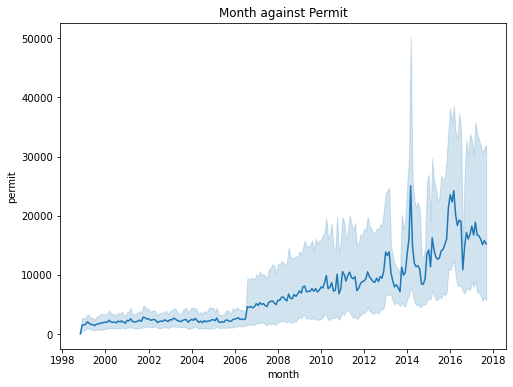

In [400]:
#df_gun.groupby('month').permit.sum().plot(figsize = (10,6), )
fig , ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=df_gun, x='month', y='permit', ax = ax ).set(title = 'Month against Permit')

 From the plot,It was observed that towards the end of 1998,there was a steady rise in the issuance of permit, there was drop around 2006,a spike in 2007 which continued to 2014 wherein the highest permit was close to 3000 followed by a steep drop to around 800 permit in 2014, followed by 2016 which was the second highest in the issuance of permit. another 

In [401]:
#lets extract the new total for the selected variables from the main dataset 
df_gun['total_gun'] = df_gun.handgun + df_gun.long_gun + df_gun.other
df_gun.head()

,month,state,permit,handgun,long_gun,other,total_gun
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,12275.0
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,5469.0
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,19929.0
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,10575.0
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,64730.0


[Text(0.5, 1.0, 'Month against total gun')]

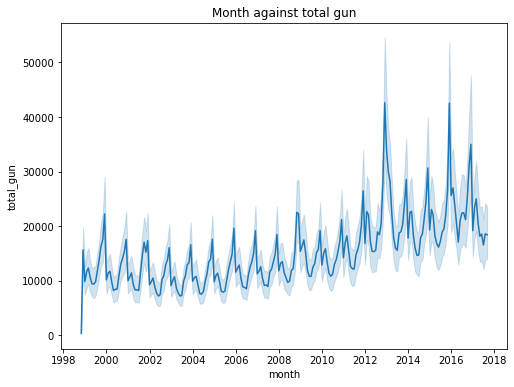

In [402]:
# Display
fig , ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=df_gun, x='month', y='total_gun', ax = ax ).set(title = 'Month against total gun')

 from the figure above ,The hihgest permit issuance was in 2017 and 2014 repectively

### Research Question 2  What is the gun trend in the Country?

C:\Users\HP\AppData\Local\Temp/ipykernel_8656/1100687756.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gun_2010.groupby('state')['handgun', 'long_gun'].mean().plot.bar(figsize = (15,6), title ='Gun trend')


<AxesSubplot:title={'center':'Gun trend'}, xlabel='state'>

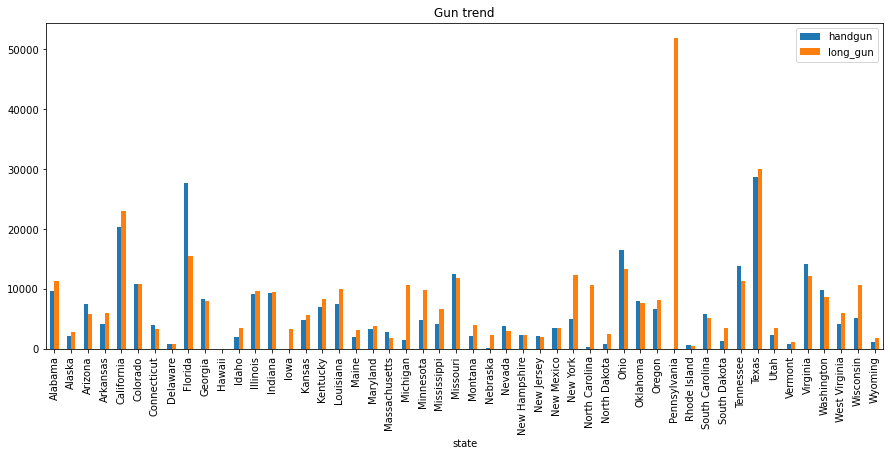

In [403]:
# what is the the Gun trend in the country
#Display Gun trend
df_gun_2010 = df_gun[df_gun.month.dt.year == 2010]
df_gun_2010.groupby('state')['handgun', 'long_gun'].mean().plot.bar(figsize = (15,6), title ='Gun trend')

This plot shows that for each of the state, the trend tilts towards the longun_gun

In [404]:
y_gun = df_gun_2010.groupby('state').mean()
y_gun.head()

,permit,handgun,long_gun,other,total_gun
state,,,,,
Alabama,385.083333,9746.916667,11376.583333,147.583333,21271.083333
Alaska,0.000000,2143.333333,2764.750000,68.750000,4976.833333
Arizona,2062.583333,7430.166667,5755.583333,174.250000,13360.000000
Arkansas,2608.750000,4166.000000,6017.166667,53.000000,10236.166667
California,24604.333333,20429.916667,22954.833333,0.000000,43384.750000


In [405]:
df_census.head()

,Unnamed: 0,state,population_2016,population_2010,u18_percent_2016,u18_percent_2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
0,1,Alabama,4863300,4779736,22.6,23.7,77.4,76.3,3.764194e+06,3.646939e+06
1,2,Alaska,741894,710231,25.2,26.4,74.8,73.6,5.549367e+05,5.227300e+05
2,3,Arizona,6931071,6392017,23.5,25.5,76.5,74.5,5.302269e+06,4.762053e+06
3,4,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6,2.283021e+06,2.204434e+06
4,5,California,39250017,37253956,23.2,25.0,76.8,75.0,3.014401e+07,2.794047e+07


In [406]:
df_census.columns

Index(['Unnamed: 0', 'state', 'population_2016', 'population_2010',
       'u18_percent_2016', 'u18_percent_2010', 'percent_adult_2016',
       'percent_adult_2010', 'adult_population_2016', 'adult_population_2010'],
      dtype='object')

In [407]:
df_census_2010 = df_census[['state', 'adult_population_2010']]
df_census_2010.shape

(50, 2)

In [408]:
# For this reseearch we are going to merge the gun and census dataset for year 2010
df_2010 = pd.merge(y_gun, df_census_2010, how= 'outer', on= 'state')

In [409]:
df_gun_2010.shape

(600, 7)

In [410]:
df_2010

,state,permit,handgun,long_gun,other,total_gun,adult_population_2010
0,Alabama,385.083333,9746.916667,11376.583333,147.583333,21271.083333,3.646939e+06
1,Alaska,0.000000,2143.333333,2764.750000,68.750000,4976.833333,5.227300e+05
2,Arizona,2062.583333,7430.166667,5755.583333,174.250000,13360.000000,4.762053e+06
3,Arkansas,2608.750000,4166.000000,6017.166667,53.000000,10236.166667,2.204434e+06
4,California,24604.333333,20429.916667,22954.833333,0.000000,43384.750000,2.794047e+07
5,Colorado,1077.333333,10846.250000,10803.500000,0.000000,21649.750000,3.802072e+06
6,Connecticut,7578.500000,3962.083333,3378.833333,39.166667,7380.083333,2.755629e+06
7,Delaware,0.000000,769.166667,788.833333,17.250000,1575.250000,6.923071e+05
8,Florida,2.916667,27697.583333,15556.250000,0.000000,43253.833333,1.479663e+07
9,Georgia,7996.583333,8262.083333,7961.750000,101.916667,16325.750000,7.197926e+06


### Research Question 3  What State has the maximum and minimum gun possession per capita

In [421]:
# what state had the highest gun per capita
df_2010['total_gun'] = df_2010.handgun + df_2010.long_gun + df_2010.other
df_2010['gun_per_capita'] = df_2010['total_gun']/df_2010.adult_population_2010
df_2010.head()#df_2010['total_gun'] = df_2010.handgun + df_2010.long_gun + df_2010.other
df_2010['gun_per_capita'] = df_2010['total_gun']/df_2010.adult_population_2010


In [422]:
#confirm changes
df_2010.head()

,state,permit,handgun,long_gun,other,total_gun,adult_population_2010,gun_per_capita
0,Alabama,385.083333,9746.916667,11376.583333,147.583333,21271.083333,3.646939e+06,0.005833
1,Alaska,0.000000,2143.333333,2764.750000,68.750000,4976.833333,5.227300e+05,0.009521
2,Arizona,2062.583333,7430.166667,5755.583333,174.250000,13360.000000,4.762053e+06,0.002806
3,Arkansas,2608.750000,4166.000000,6017.166667,53.000000,10236.166667,2.204434e+06,0.004643
4,California,24604.333333,20429.916667,22954.833333,0.000000,43384.750000,2.794047e+07,0.001553


In [413]:
# states showing its firearm posssion per capita
max_five = df_2010.nlargest(n = 5, columns= 'gun_per_capita')
max_five

,state,permit,handgun,long_gun,other,total_gun,adult_population_2010,gun_per_capita
1,Alaska,0.000000,2143.333333,2764.750000,68.750000,4976.833333,5.227300e+05,0.009521
25,Montana,654.750000,2090.250000,4013.583333,40.333333,6144.166667,7.658072e+05,0.008023
49,Wyoming,493.000000,1215.750000,1790.833333,25.250000,3031.833333,4.283558e+05,0.007078
47,West Virginia,14.916667,4112.583333,6008.833333,64.416667,10185.833333,1.465718e+06,0.006949
40,South Dakota,0.000000,1385.333333,3450.250000,23.666667,4859.250000,8.121527e+05,0.005983


[Text(0.5, 1.0, 'State with Highest Gun per Capital')]

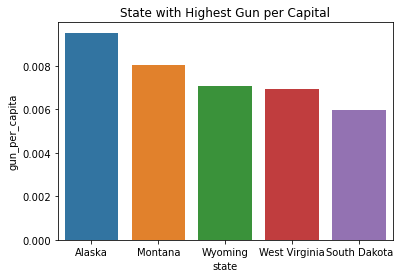

In [414]:
# Display state that has the highest gun poessesion per capita
sns.barplot(data= max_five , x = 'state', y = 'gun_per_capita').set(title = 'State with Highest Gun per Capital')

from this plot, it shows that the State of Alaska has the highest gun per capita while the least was South Dakorta

In [415]:
# State with lowest gun possesion per capita
min_five = df_2010.nsmallest(n = 5, columns= 'gun_per_capita')
min_five

,state,permit,handgun,long_gun,other,total_gun,adult_population_2010,gun_per_capita
10,Hawaii,877.250000,0.000000,0.000000,0.000000,0.000000,1.056954e+06,0.000000
29,New Jersey,0.000000,2132.750000,2002.666667,0.000000,4135.416667,6.725799e+06,0.000615
31,New York,2503.916667,4987.333333,12294.916667,245.833333,17528.083333,1.933489e+07,0.000907
20,Massachusetts,4872.833333,2789.000000,1825.250000,83.416667,4697.666667,5.126794e+06,0.000916
38,Rhode Island,0.000000,636.750000,505.166667,17.833333,1159.750000,1.050325e+06,0.001104


[Text(0.5, 1.0, 'State with Lowest Gun per Capital')]

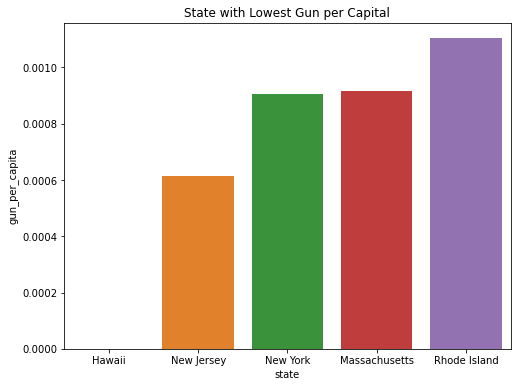

In [416]:
#Display State with lowest gun per capita
fig , ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= min_five , x = 'state', y = 'gun_per_capita', ax = ax).set(title = 'State with Lowest Gun per Capital')

This plot shows Rhode island has lowest gun per capita while the least is Hawaaii

<AxesSubplot:xlabel='state', ylabel='total_gun'>

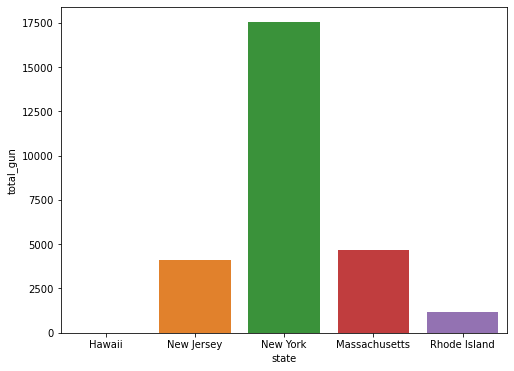

In [249]:
fig , ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= min_five , x = 'state', y = 'total_gun', ax = ax)

### Research Question 4 What firearm in percentage is most possesed.

In [417]:
# what firearm in percentage is most possessed
total_handgun = df_gun.handgun.sum()
total_longgun = df_gun.long_gun.sum()
total_other = df_gun.other.sum()

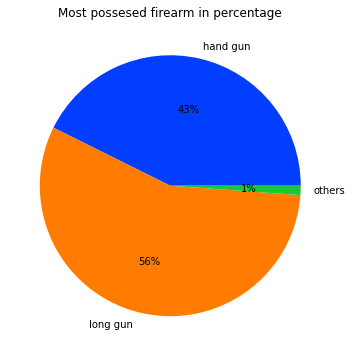

In [424]:
#Display firearm possesseion
data= [total_handgun, total_longgun, total_other]
keys = ['hand gun', 'long gun', 'others']
color = sns.color_palette('bright')
plt.figure(figsize=(6,6))
plt.title('Most possesed firearm in percentage')
plt.pie(data, labels= keys, colors=color, autopct = '%.0f%%')
plt.show()

 The piecahrt shows that most preferrrd firearm is the longgun having 56% poseesion rate ,followed by the handgun while the least preferred is others

<a id='conclusions'></a>
## Conclusions
The Cenus and the Gun dataset had variables that were similar, from the study it was observed that 
1. The hihgest permit issuance was in 2017 and 2014 repectively
2. There was a tilt towards the possession of the long-gun.
3. The state with maximum gun possession per capita was Alaska while the least was South Dakorta while the State having the minimum gun possesion per capita was Rhode islands and the least was Hawaii.
4. The most posesseed firearm in percntage was longgun 

#### limitations, 
* There were some datas in the gun dataset that were not captured in the census dataset 






In [420]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295